In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load dataset
df = pd.read_csv('laptop_price.csv', encoding="ISO-8859-1") # Pakai encoding ISO-8859 soalnya data saya ga bisa di-load pakai UTF-8

# Cek missing value
print("Missing value di setiap kolom:")
miss_value = df.isnull().sum()
print(miss_value)
# Tidak ada missing value

Missing value di setiap kolom:
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


In [2]:
duplikat = df.duplicated().sum()
print("Jumlah data duplikat:",duplikat)

Jumlah data duplikat: 0


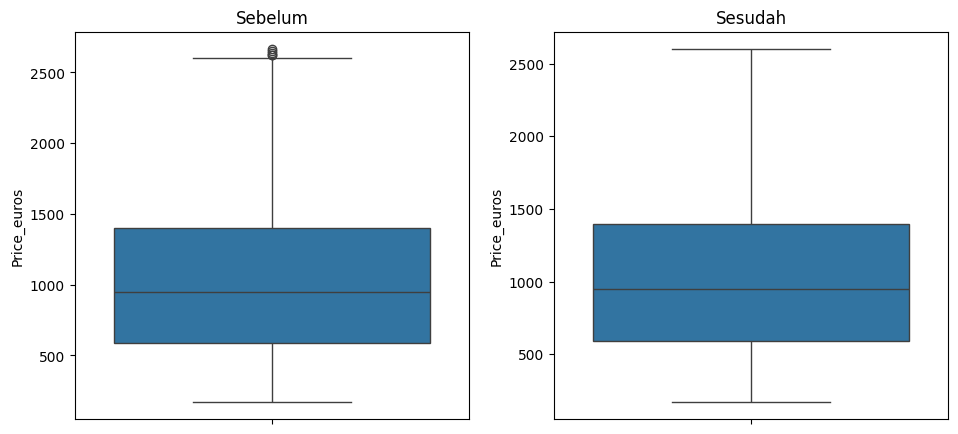

Jumlah data sebelum: 1303
Jumlah data setelah: 1256


In [5]:
import seaborn as sns
from scipy import stats

# Visualisasi sebelum handling outlier
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.tight_layout(pad=3.0)

# Sebelum
sns.boxplot(df['Price_euros'], orient='v', ax=axes[0])
axes[0].set_title("Sebelum")

# Menangani outlier dengan IQR
Q1 = df['Price_euros'].quantile(0.25)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3 - Q1  # Perhitungan IQR yang benar

# Hapus outlier
df = df[~((df['Price_euros'] < (Q1 - 1.5 * IQR)) |
         (df['Price_euros'] > (Q3 + 1.5 * IQR)))]

# Visualisasi setelah handling outlier
sns.boxplot(df['Price_euros'], orient='v', ax=axes[1])
axes[1].set_title("Sesudah")
plt.show()

print(f"Jumlah data sebelum: {len(pd.read_csv('laptop_price.csv', encoding="ISO-8859-1"))}")
print(f"Jumlah data setelah: {len(df)}")

In [9]:
# Ambil data numerik
data_numerik = ['Inches', 'Price_euros']

# Inisialisasi Scaler
scaler = MinMaxScaler()

# Proses Normalisasi
normalisasi = df.copy()
normalisasi[data_numerik] = scaler.fit_transform(normalisasi[data_numerik])

# Menampilkan hasil normalisasi
print("\nNormalized data sample:")
print(normalisasi.head())


Normalized data sample:
   laptop_ID Company      Product   TypeName    Inches  \
0          1   Apple  MacBook Pro  Ultrabook  0.444444   
1          2   Apple  Macbook Air  Ultrabook  0.444444   
2          3      HP       250 G6   Notebook  0.763889   
3          4   Apple  MacBook Pro  Ultrabook  0.736111   
4          5   Apple  MacBook Pro  Ultrabook  0.444444   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Int

In [15]:
# Ambil kolom kategorikal
kolom_kategorikal = ['Company', 'TypeName', 'OpSys']

# Inisialisasi OneHotEncoder dengan sparse_output=False
encoder = OneHotEncoder(sparse_output=False)

# Fit dan transform data kategorikal
encoded_data = encoder.fit_transform(df[kolom_kategorikal])

# Ubah hasil transformasi menjadi data frame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(kolom_kategorikal))

# Gabungkan data frame hasil encoding dengan data frame asli
df_encoded = pd.concat([df, encoded_df], axis=1)

# Hapus kolom kategorikal asli
df_encoded = df_encoded.drop(kolom_kategorikal, axis=1)

print("Shape setelah encoding:", df_encoded.shape)
print("\nSample data setelah encoding:")
print(df_encoded.head())

Shape setelah encoding: (1303, 44)

Sample data setelah encoding:
   laptop_ID      Product  Inches                    ScreenResolution  \
0          1  MacBook Pro    13.3  IPS Panel Retina Display 2560x1600   
1          2  Macbook Air    13.3                            1440x900   
2          3       250 G6    15.6                   Full HD 1920x1080   
3          4  MacBook Pro    15.4  IPS Panel Retina Display 2880x1800   
4          5  MacBook Pro    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  Weight  Price_euros  ...  \
0  Intel Iris Plus Graphics 640  1.37kg      1339.69  ...   
1        Int

In [21]:
# Membuat kategori berdasarkan harga laptop
# batas harga
price_bins = [0, 600, 1200, 2000, 3000, np.inf]
# nama kategori
label_price = ['Budget', 'Mid-range', 'Premium', 'High-end', 'Ultra-premium']

# Membuat kolom baru dengan kategori harga
df['Price_Category'] = pd.cut(df['Price_euros'], bins=price_bins, labels=label_price)

# Membuat kategori berdasarkan ukuran layar
# batas ukuran layar
size_bins = [0, 13, 14, 16, 18, np.inf]
# nama kategori
label_size = ['Small', 'Medium', 'Large', 'Extra-large', 'Gaming']

# Membuat kolom baru dengan kategori ukuran layar
df['Size_Category'] = pd.cut(df['Inches'], bins=size_bins, labels=label_size)

# Membuat kategori berdasarkan RAM
# batas RAM
ram_bins = [0, 4, 8, 16, 32, np.inf]
# nama kategori
label_ram = ['Low', 'Standard', 'High', 'Very High', 'Extreme']

# Percabangan buat ambil numeriknya (karena ada GB)
if df['Ram'].dtype == 'object':
    # Gunakan raw string untuk regex pattern
    df['Ram'] = df['Ram'].str.extract(r'(\d+)').astype(float)
    print("Kolom 'Ram' telah dikonversi dari string ke numerik")

# Hapus baris dengan NaN jika ada
df = df.dropna(subset=['Ram'])

# Membuat kolom baru dengan kategori RAM
df['Ram_Category'] = pd.cut(df['Ram'], bins=ram_bins, labels=label_ram)

print("Data setelah feature engineering:")
print(df[['Price_euros', 'Price_Category', 'Inches', 'Size_Category', 'Ram', 'Ram_Category']].head())

print("\nJumlah laptop per kategori harga:")
print(df['Price_Category'].value_counts())

print("\nJumlah laptop per kategori ukuran layar:")
print(df['Size_Category'].value_counts())

print("\nJumlah laptop per kategori RAM:")
print(df['Ram_Category'].value_counts())

Data setelah feature engineering:
   Price_euros Price_Category  Inches Size_Category   Ram Ram_Category
0      1339.69        Premium    13.3        Medium   8.0     Standard
1       898.94      Mid-range    13.3        Medium   8.0     Standard
2       575.00         Budget    15.6         Large   8.0     Standard
3      2537.45       High-end    15.4         Large  16.0         High
4      1803.60        Premium    13.3        Medium   8.0     Standard

Jumlah laptop per kategori harga:
Price_Category
Mid-range        510
Budget           330
Premium          326
High-end         118
Ultra-premium     19
Name: count, dtype: int64

Jumlah laptop per kategori ukuran layar:
Size_Category
Large          674
Medium         373
Extra-large    165
Small           90
Gaming           1
Name: count, dtype: int64

Jumlah laptop per kategori RAM:
Ram_Category
Standard     660
Low          397
High         225
Very High     20
Extreme        1
Name: count, dtype: int64


In [22]:
X = df_encoded.drop(['laptop_ID', 'Product', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'Price_euros'], axis=1)
y = df['Price_euros']  # Pakai harga asli bukan hasil normalisasi

# Proses split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData splitting results:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


Data splitting results:
Training set size: 1042 samples
Testing set size: 261 samples
Training features shape: (1042, 37)
Testing features shape: (261, 37)
